# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


d:\softwares\Python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data evaluation

In [2]:
df =  pd.read_csv("Static_dataset.csv")

In [3]:
df.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [4]:
df.count()

timestamp           268074
FQDN_count          268074
subdomain_length    268074
upper               268074
lower               268074
numeric             268074
entropy             268074
special             268074
labels              268074
labels_max          268074
labels_average      268074
longest_word        268066
sld                 268074
len                 268074
subdomain           268074
Target Attack       268074
dtype: int64

In [5]:
df['Target Attack'].value_counts()

1    147179
0    120895
Name: Target Attack, dtype: int64

In [6]:
df.isnull().sum()
df.fillna(0,inplace=True)

In [7]:
percentageID0 = df['Target Attack'].count()
class0 =  (df['Target Attack'].value_counts()[0]/percentageID0)*100
print('Class 0 percentage ', class0, '%')
class1 =  (df['Target Attack'].value_counts()[1]/percentageID0)*100
print('Class 1 percentage ', class1, '%')


Class 0 percentage  45.09762229832061 %
Class 1 percentage  54.902377701679384 %


from the data we can conclued that the data is not imbalanced since the distribution of binary class is almost same

In [8]:
g = df['Target Attack']
data = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (data)

   counts  percentage
1  147179   54.902378
0  120895   45.097622


Text(0.5, 0, 'target attack classes')

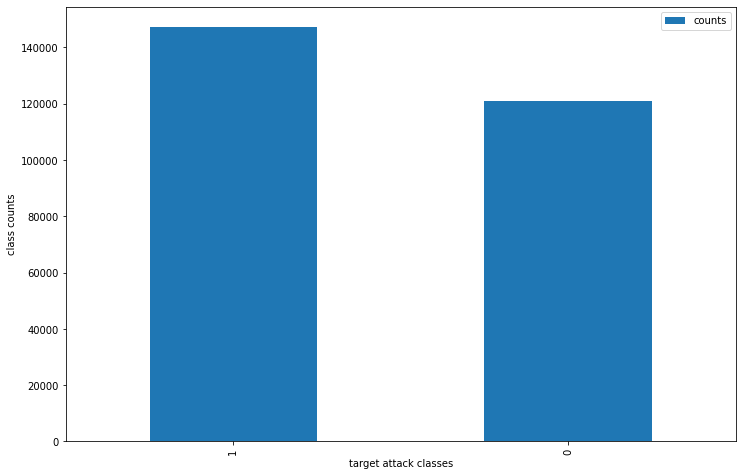

In [9]:
data.plot.bar(figsize=(12,8),y = 'counts', align='center')
plt.ylabel('class counts')
plt.xlabel('target attack classes')

## Data count

<Figure size 1440x288 with 0 Axes>

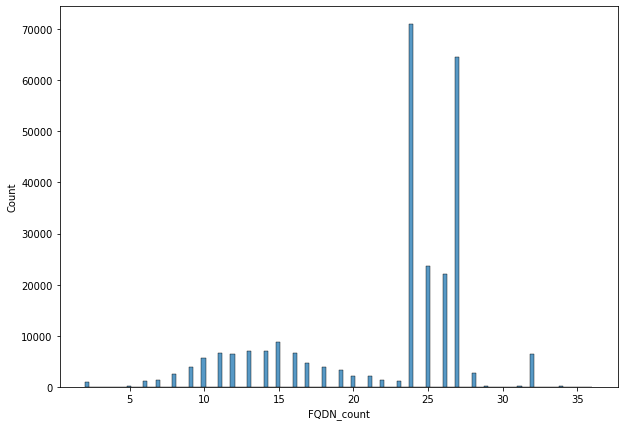

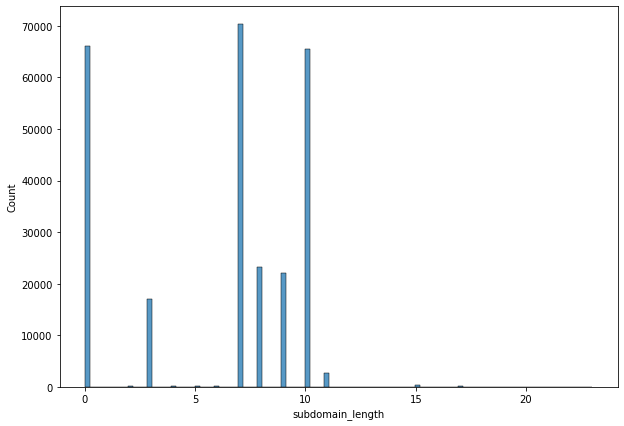

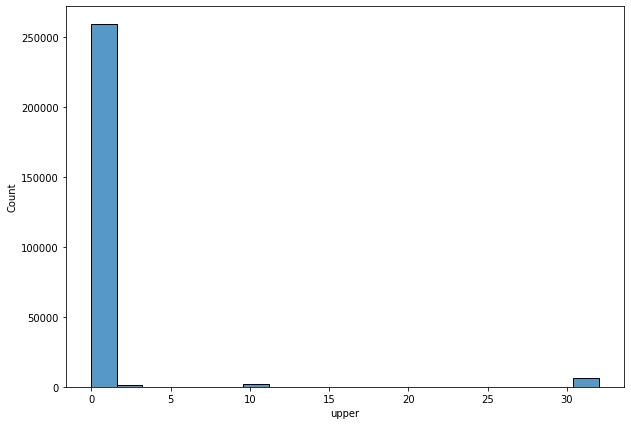

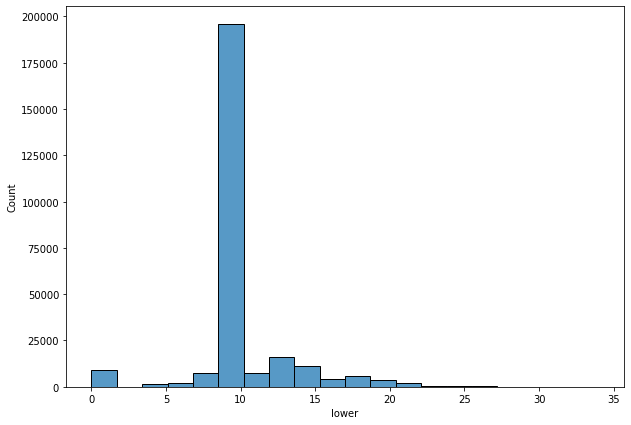

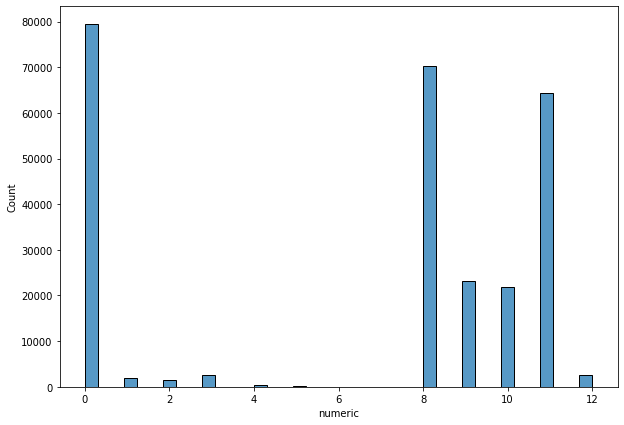

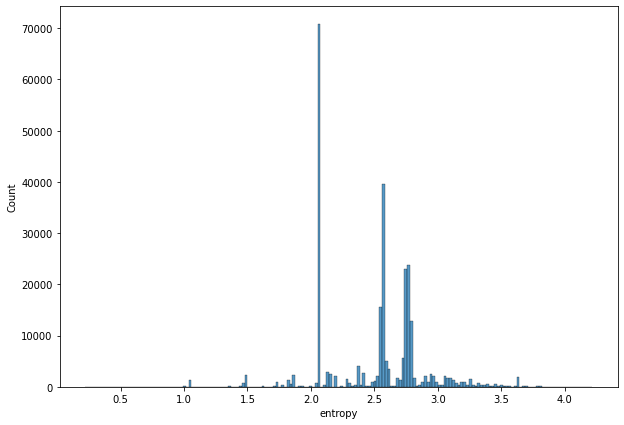

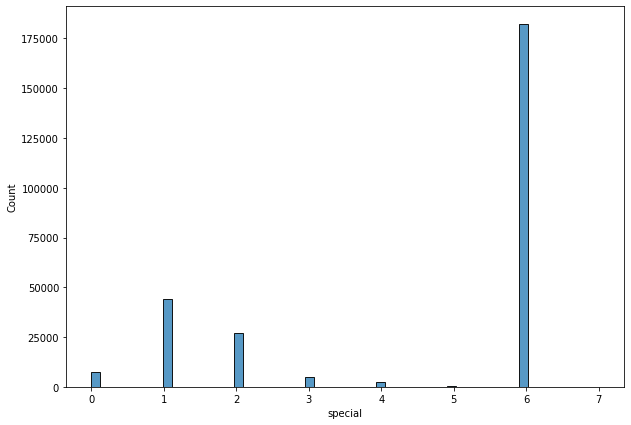

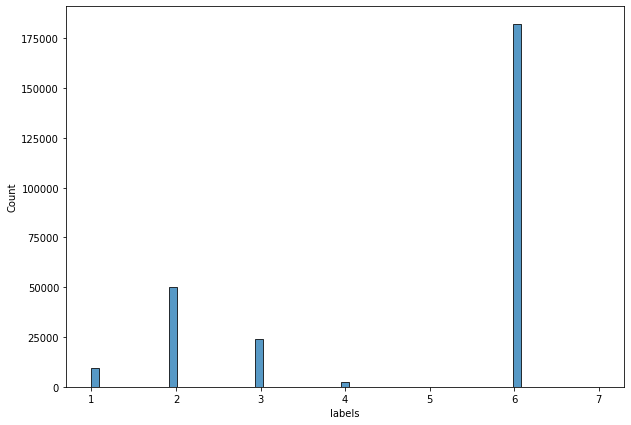

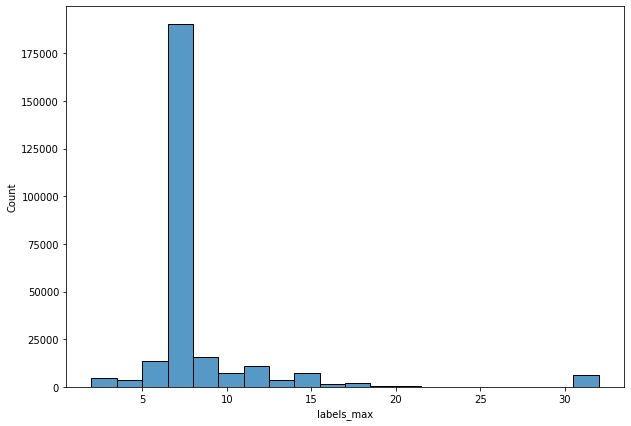

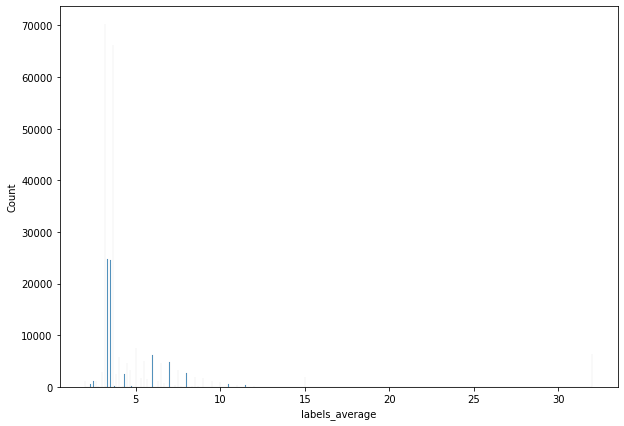

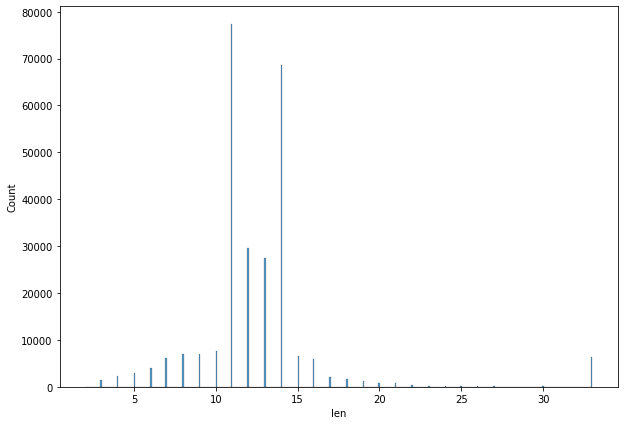

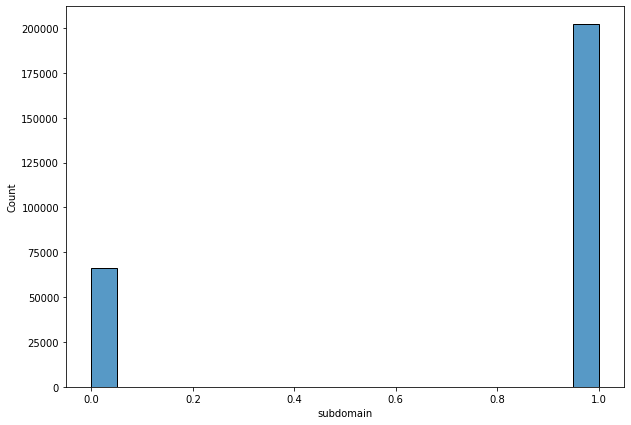

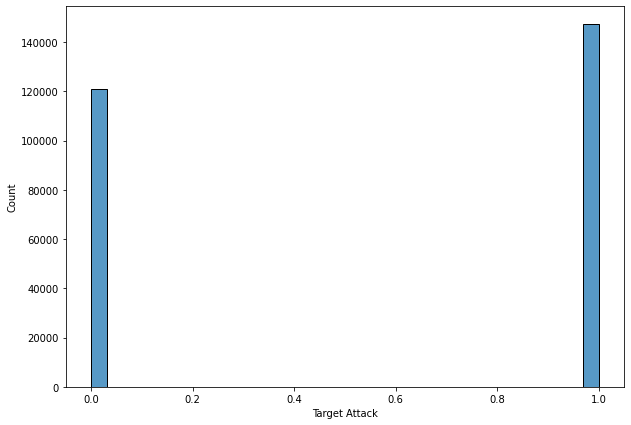

In [10]:
numerical = df.select_dtypes('number').columns
plt.figure(figsize=(20,4))
for col in numerical:
    fig = plt.subplots(1, figsize=(10,7))
    sns.histplot(data=df, x=col);

## Finding Data distribution

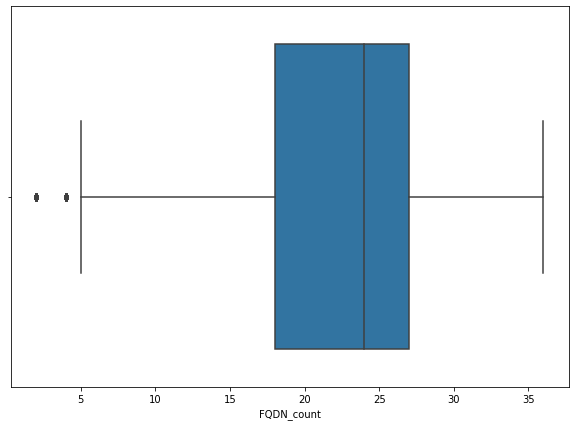

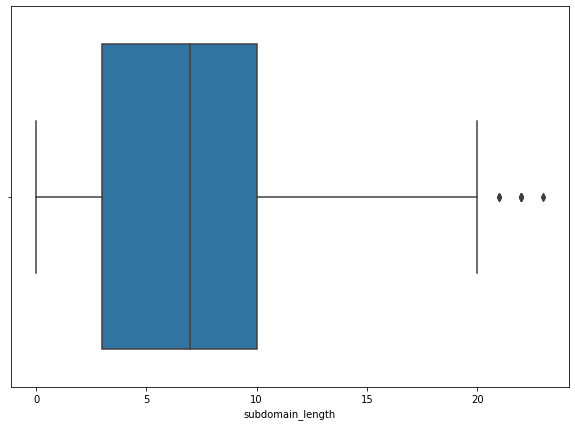

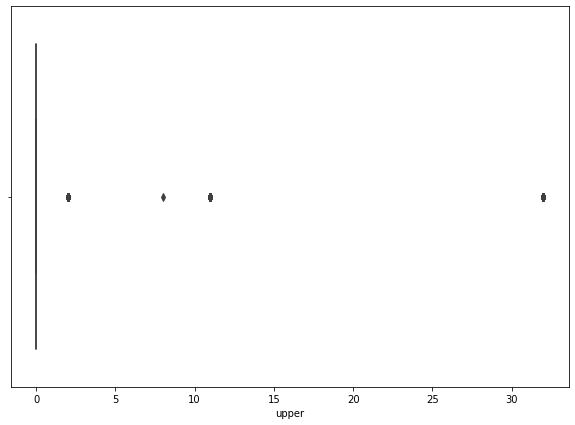

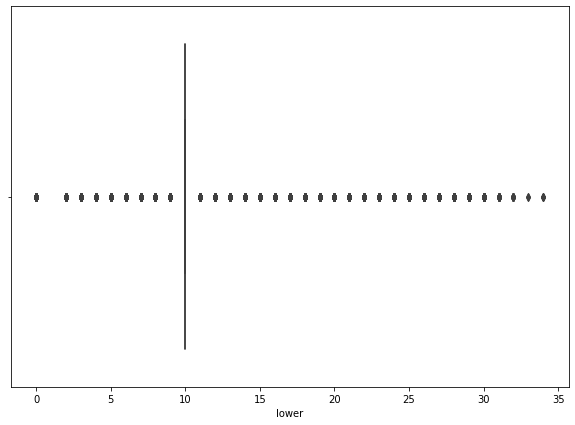

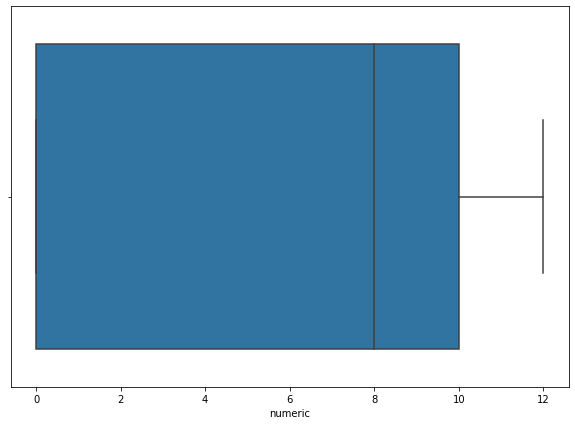

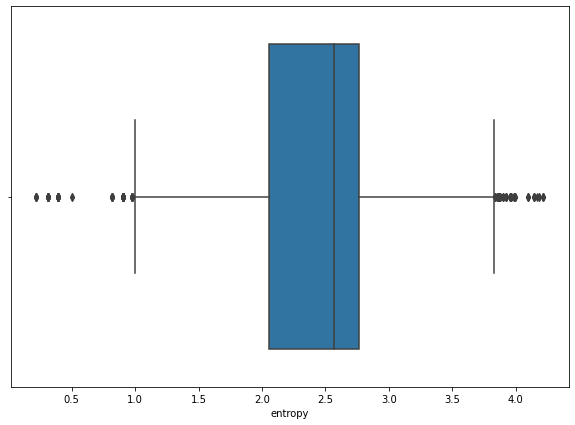

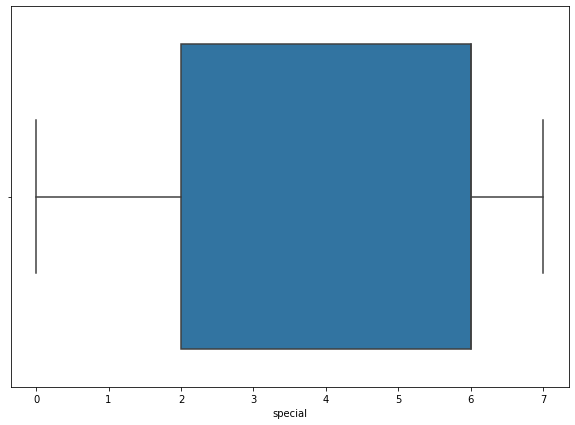

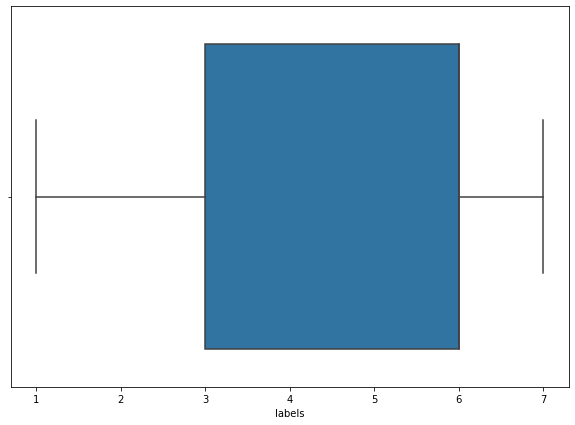

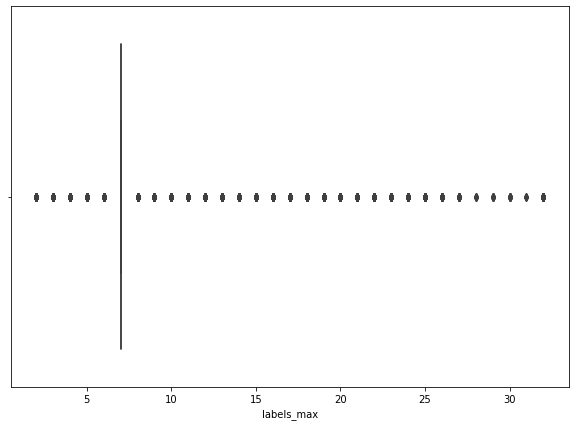

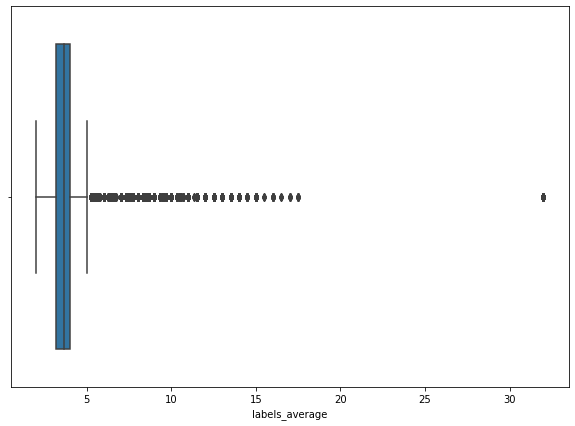

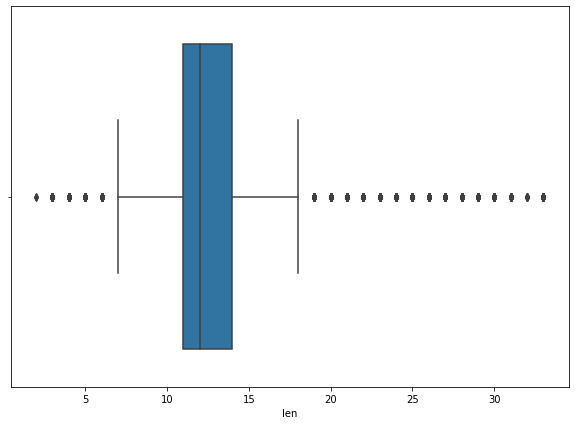

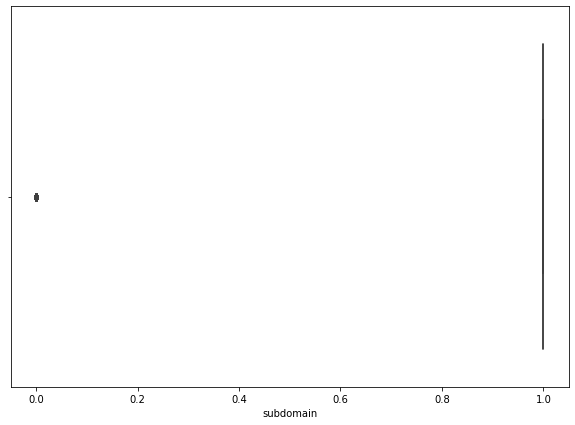

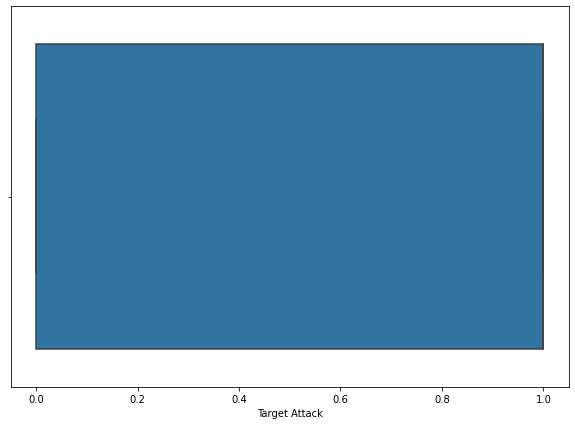

In [11]:
for col in numerical:
    fig = plt.subplots(1, figsize=(10,7))
    sns.boxplot(data=df, x=col);

## Getting coorelation of features 

<AxesSubplot:>

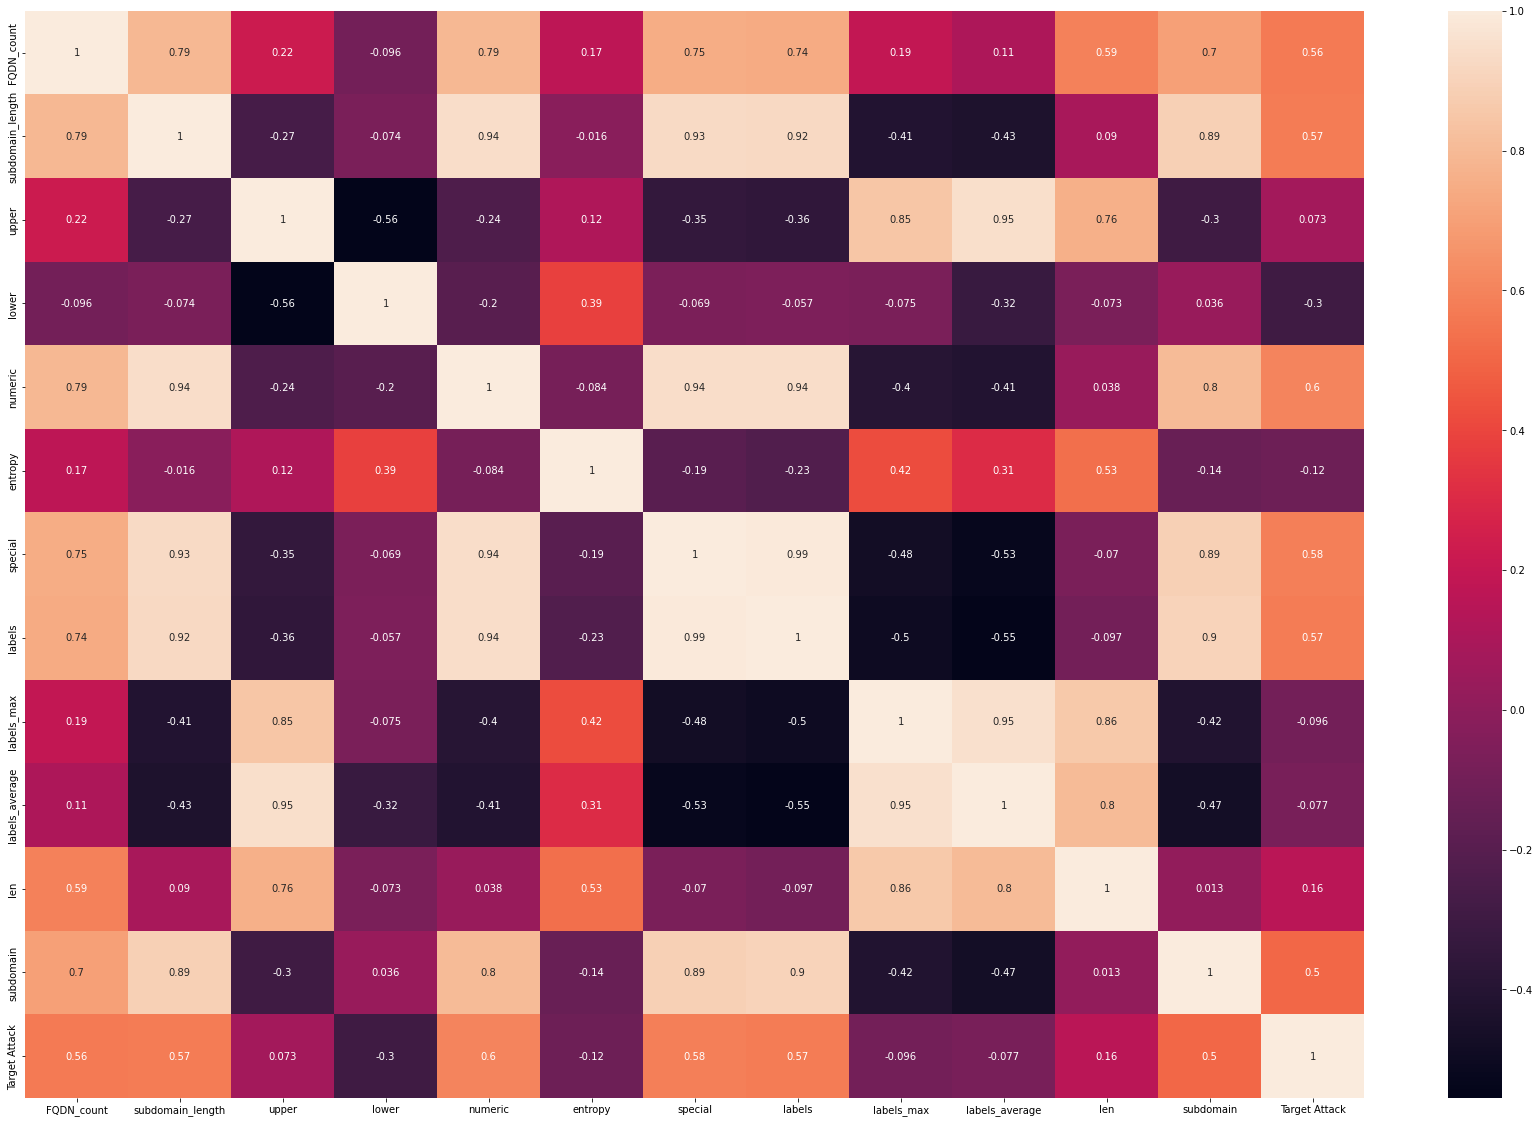

In [12]:
corr = df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True)

In [13]:
correlation_target = abs(corr['Target Attack'])
correlation_target

FQDN_count          0.563563
subdomain_length    0.572053
upper               0.072895
lower               0.295599
numeric             0.599252
entropy             0.119050
special             0.582107
labels              0.569414
labels_max          0.096350
labels_average      0.077167
len                 0.159437
subdomain           0.502469
Target Attack       1.000000
Name: Target Attack, dtype: float64

In [14]:
df.corr()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
FQDN_count,1.000000,0.788615,0.223162,-0.095881,0.793079,0.167806,0.748354,0.739786,0.186992,0.109444,0.588849,0.698685,0.563563
subdomain_length,0.788615,1.000000,-0.265780,-0.073809,0.944548,-0.015773,0.929076,0.923210,-0.410820,-0.431748,0.090472,0.888718,0.572053
upper,0.223162,-0.265780,1.000000,-0.555147,-0.236155,0.115458,-0.347061,-0.359428,0.847046,0.946883,0.759096,-0.299079,0.072895
lower,-0.095881,-0.073809,-0.555147,1.000000,-0.197667,0.385455,-0.068635,-0.057215,-0.074632,-0.318585,-0.072903,0.036077,-0.295599
numeric,0.793079,0.944548,-0.236155,-0.197667,1.000000,-0.084281,0.941951,0.940191,-0.395441,-0.411193,0.037743,0.801602,0.599252
entropy,0.167806,-0.015773,0.115458,0.385455,-0.084281,1.000000,-0.192317,-0.226686,0.418591,0.307460,0.526296,-0.138240,-0.119050
special,0.748354,0.929076,-0.347061,-0.068635,0.941951,-0.192317,1.000000,0.991309,-0.477689,-0.525847,-0.070203,0.890508,0.582107
labels,0.739786,0.923210,-0.359428,-0.057215,0.940191,-0.226686,0.991309,1.000000,-0.497794,-0.545609,-0.096721,0.898859,0.569414
labels_max,0.186992,-0.410820,0.847046,-0.074632,-0.395441,0.418591,-0.477689,-0.497794,1.000000,0.954819,0.856082,-0.420510,-0.096350
labels_average,0.109444,-0.431748,0.946883,-0.318585,-0.411193,0.307460,-0.525847,-0.545609,0.954819,1.000000,0.802346,-0.473714,-0.077167


## Feature hashing for categorical values

In [15]:
fh = FeatureHasher(n_features=3, input_type='string')

In [16]:
#for feature timestamp
hashed1 = fh.transform(df[['timestamp']].astype(str).values)
hashed1 = pd.DataFrame(hashed1.todense())
hashed1.columns = ['timestamp_fh'+str(i) for i in hashed1.columns]
hashed1

,timestamp_fh0,timestamp_fh1,timestamp_fh2
0,0.0,-1.0,0.0
1,0.0,1.0,0.0
2,-1.0,0.0,0.0
3,0.0,1.0,0.0
4,-1.0,0.0,0.0
...,...,...,...
268069,0.0,1.0,0.0
268070,0.0,0.0,-1.0
268071,0.0,0.0,1.0
268072,0.0,0.0,1.0


In [17]:
hashed2 = fh.transform(df[['longest_word']].astype(str).values)
hashed2 = pd.DataFrame(hashed2.todense())
hashed2.columns = ['longest_word_fh'+str(i) for i in hashed2.columns]
hashed2

,longest_word_fh0,longest_word_fh1,longest_word_fh2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
268069,0.0,0.0,-1.0
268070,1.0,0.0,0.0
268071,1.0,0.0,0.0
268072,1.0,0.0,0.0


In [18]:
hashed3 = fh.transform(df[['sld']].astype(str).values)
hashed3 = pd.DataFrame(hashed3.todense())
hashed3.columns = ['sld_fh'+str(i) for i in hashed3.columns]
hashed3

,sld_fh0,sld_fh1,sld_fh2
0,-1.0,0.0,0.0
1,-1.0,0.0,0.0
2,-1.0,0.0,0.0
3,-1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
268069,1.0,0.0,0.0
268070,-1.0,0.0,0.0
268071,-1.0,0.0,0.0
268072,0.0,1.0,0.0


In [19]:
df_1 = pd.concat([df,hashed1,hashed2,hashed3],axis=1)
df_1

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,...,Target Attack,timestamp_fh0,timestamp_fh1,timestamp_fh2,longest_word_fh0,longest_word_fh1,longest_word_fh2,sld_fh0,sld_fh1,sld_fh2
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,...,1,0.0,-1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,...,1,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,...,0,-1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,...,1,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,...,1,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,...,0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,...,0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0
268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,...,1,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.0,0.0
268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,...,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [20]:
X =df_1.drop(["timestamp", "longest_word", "sld", "Target Attack"], axis = 1)
X

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,...,subdomain,timestamp_fh0,timestamp_fh1,timestamp_fh2,longest_word_fh0,longest_word_fh1,longest_word_fh2,sld_fh0,sld_fh1,sld_fh2
0,27,10,0,10,11,2.570417,6,6,7,3.666667,...,1,0.0,-1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
1,27,10,0,10,11,2.767195,6,6,7,3.666667,...,1,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
2,26,9,0,10,10,2.742338,6,6,7,3.500000,...,1,-1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,...,1,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
4,15,9,0,11,0,2.929439,4,3,5,4.333333,...,1,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,18,3,0,16,0,2.338623,2,3,10,5.333333,...,1,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
268070,27,10,0,10,11,2.767195,6,6,7,3.666667,...,1,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0
268071,27,10,0,10,11,2.767195,6,6,7,3.666667,...,1,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.0,0.0
268072,16,0,0,14,0,3.249687,2,2,13,7.500000,...,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
y = df["Target Attack"]
y

0         1
1         1
2         0
3         1
4         1
         ..
268069    0
268070    0
268071    1
268072    0
268073    1
Name: Target Attack, Length: 268074, dtype: int64

## Feature selection using SelectKBest

In [22]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
#Select top features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =11)
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['FQDN_count', 'subdomain_length', 'lower', 'numeric', 'entropy',
       'special', 'labels', 'labels_max', 'labels_average', 'len',
       'subdomain'],
      dtype='object')

In [23]:
#feature selection using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# #Selecting the Best important features according to Logistic Regression
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 11, step = 11)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

d:\softwares\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\softwares\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

Index(['subdomain_length', 'lower', 'numeric', 'special', 'labels_max', 'len',
       'longest_word_fh0', 'longest_word_fh1', 'sld_fh0', 'sld_fh1',
       'sld_fh2'],
      dtype='object')

## choosing best features

In [24]:
train_labels = X[['subdomain_length', 'lower', 'numeric', 'special', 'labels_max', 'len',
       'longest_word_fh0', 'longest_word_fh1', 'sld_fh0', 'sld_fh1',
       'sld_fh2']]
train_labels

,subdomain_length,lower,numeric,special,labels_max,len,longest_word_fh0,longest_word_fh1,sld_fh0,sld_fh1,sld_fh2
0,10,10,11,6,7,14,1.0,0.0,-1.0,0.0,0.0
1,10,10,11,6,7,14,1.0,0.0,-1.0,0.0,0.0
2,9,10,10,6,7,13,1.0,0.0,-1.0,0.0,0.0
3,10,10,11,6,7,14,1.0,0.0,-1.0,0.0,0.0
4,9,11,0,4,5,15,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
268069,3,16,0,2,10,14,0.0,0.0,1.0,0.0,0.0
268070,10,10,11,6,7,14,1.0,0.0,-1.0,0.0,0.0
268071,10,10,11,6,7,14,1.0,0.0,-1.0,0.0,0.0
268072,0,14,0,2,13,14,1.0,0.0,0.0,1.0,0.0


## Normalizing the dataset

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_labels)
transform_data = scaler.transform(train_labels)
transform_data

array([[0.43478261, 0.29411765, 0.91666667, ..., 0.        , 0.5       ,
        0.5       ],
       [0.43478261, 0.29411765, 0.91666667, ..., 0.        , 0.5       ,
        0.5       ],
       [0.39130435, 0.29411765, 0.83333333, ..., 0.        , 0.5       ,
        0.5       ],
       ...,
       [0.43478261, 0.29411765, 0.91666667, ..., 0.        , 0.5       ,
        0.5       ],
       [0.        , 0.41176471, 0.        , ..., 0.5       , 1.        ,
        0.5       ],
       [0.43478261, 0.29411765, 0.91666667, ..., 0.        , 0.5       ,
        0.5       ]])

## Splitting the Dataset

## 70 30 split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_labels,y ,
                                   random_state=104, 
                                   test_size=0.30, 
                                   shuffle=True)

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
Random_forest_model=RandomForestClassifier(n_estimators=300)
Random_forest_model.fit(X_train,y_train)

rf_predicted=Random_forest_model.predict(X_test)

In [28]:
print(Random_forest_model.score(X_test,y_test))

0.8261442622135459


### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
Des_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=5,min_samples_split=10)
Des_tree_model.fit(X_train, y_train)
Descision_tree_predicted = Des_tree_model.predict(X_test)

In [30]:
print(Des_tree_model.score(X_test,y_test))

0.8259826169130722


### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=50)
knn_model.fit(X_train, y_train) 
knn_pred = knn_model.predict(X_test)

In [32]:
print(knn_model.score(X_test,y_test))

0.8255971550427117


We can conclude that the accuracy is maximum for Random forest

## 80 20 Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train_labels,y ,
                                   random_state=104, 
                                   test_size=0.20, 
                                   shuffle=True)

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
Random_forest_model=RandomForestClassifier(n_estimators=300)
Random_forest_model.fit(X_train,y_train)

rf_predicted=Random_forest_model.predict(X_test)
print(Random_forest_model.score(X_test,y_test))

0.8268954583605335


### Descision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
Des_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=5,min_samples_split=10)
Des_tree_model.fit(X_train, y_train)
Descision_tree_predicted = Des_tree_model.predict(X_test)
print(Des_tree_model.score(X_test,y_test))

0.8267835493798378


### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=50)
knn_model.fit(X_train, y_train) 
knn_pred = knn_model.predict(X_test)
print(knn_model.score(X_test,y_test))

0.8263172619602723


## 90 10 Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train_labels,y ,
                                   random_state=104, 
                                   test_size=0.10, 
                                   shuffle=True)

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
Random_forest_model=RandomForestClassifier(n_estimators=300)
Random_forest_model.fit(X_train,y_train)

rf_predicted=Random_forest_model.predict(X_test)
print(Random_forest_model.score(X_test,y_test))

0.8290062667860341


### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
Des_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=5,min_samples_split=10)
Des_tree_model.fit(X_train, y_train)
Descision_tree_predicted = Des_tree_model.predict(X_test)
print(Des_tree_model.score(X_test,y_test))

0.8289689644882124


### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=50)
knn_model.fit(X_train, y_train) 
knn_pred = knn_model.predict(X_test)
print(knn_model.score(X_test,y_test))

0.8282975231274247


## Tuning the random forest 

N estimators

In [41]:
for i in range(1,10):
    from sklearn.ensemble import RandomForestClassifier
    Random_forest_model=RandomForestClassifier(n_estimators=(i*100))
    Random_forest_model.fit(X_train,y_train)

    # rf_predicted=Random_forest_model.predict(X_test)
    print(Random_forest_model.score(X_test,y_test))

0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341


The accuracy remains same for all the n_estimators 

In [42]:
for i in range(1,32):
    from sklearn.ensemble import RandomForestClassifier
    Random_forest_model=RandomForestClassifier(max_depth=i)
    Random_forest_model.fit(X_train,y_train)

    # rf_predicted=Random_forest_model.predict(X_test)
    print(Random_forest_model.score(X_test,y_test))

0.8092360489406147
0.8213965980304386
0.8272530587884214
0.8277379886601015
0.8282975231274247
0.8282975231274247
0.8283721277230678
0.8288570575947478
0.8289689644882124
0.8289689644882124
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341
0.8290062667860341


we can observe after max depth = 11 the accuracy remains same 

In [43]:
# final random forest model
from sklearn.ensemble import RandomForestClassifier
Random_forest_model=RandomForestClassifier(n_estimators=500,max_depth=12)
Random_forest_model.fit(X_train,y_train)
rf_predicted=Random_forest_model.predict(X_test)
print(Random_forest_model.score(X_test,y_test))

0.8290062667860341


## Analyzing the Random Forest model

In [44]:
#confusion matrix of Random Forest model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_predicted)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 7634  4580]
 [    4 14590]]

True Positives(TP) =  7634

True Negatives(TN) =  14590

False Positives(FP) =  4580

False Negatives(FN) =  4


In [45]:
#confusion matrix plot of model
def confusio_matrix(y_test, pred):
  cm = confusion_matrix(y_test, pred)
  plt.figure(figsize=(15,10))
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('Random Forest model confusion matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  plt.show()

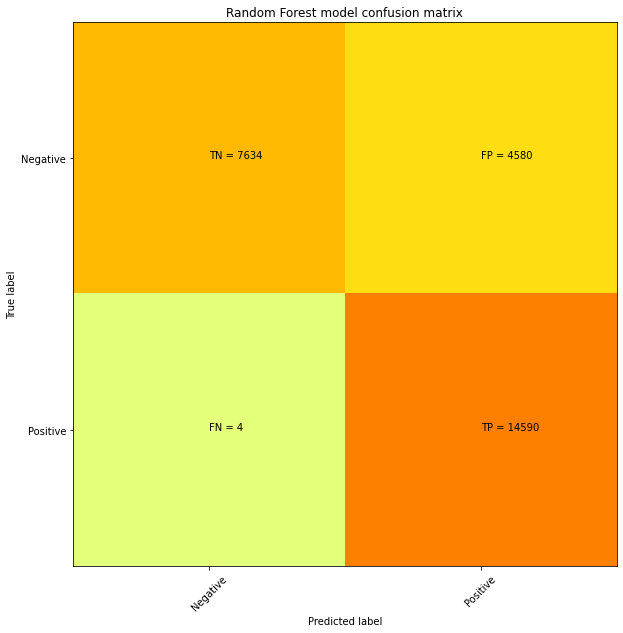

In [46]:
confusio_matrix(y_test,rf_predicted)

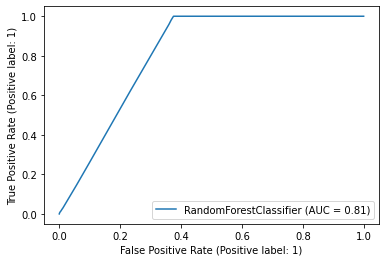

In [47]:
#ROC curve of Randomforest model
from sklearn.metrics import RocCurveDisplay
RF_disp = RocCurveDisplay.from_estimator(Random_forest_model, X_test, y_test)

In [48]:
#cross val score of Random forest model
from sklearn.model_selection import cross_val_score
cross_val_score(Random_forest_model, X_train, y_train, cv=5, scoring='recall_macro')

array([0.80457058, 0.80830472, 0.80799926, 0.80553188, 0.80659003])

In [49]:
#performance metrics of Random Forest model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('F1 score of Random forest model is ',f1_score(y_test, rf_predicted, average="macro"))
print('Precision of Random forest model is ',precision_score(y_test, rf_predicted, average="macro"))
print('Recall of Random forest model is ',recall_score(y_test, rf_predicted, average="macro"))

F1 score of Random forest model is  0.8166626854622799
Precision of Random forest model is  0.8802806656938518
Recall of Random forest model is  0.8123731915372693


In [50]:
#performance metrics class-wise of Random Forest model
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, rf_predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.9994763  0.76108503]
recall: [0.62502047 0.99972591]
fscore: [0.76909128 0.8642341 ]
support: [12214 14594]


In [51]:
#classification report of random forest model
target_names = ['class 1', 'class 2']
print(classification_report(y_test, rf_predicted, target_names=target_names))

              precision    recall  f1-score   support

     class 1       1.00      0.63      0.77     12214
     class 2       0.76      1.00      0.86     14594

    accuracy                           0.83     26808
   macro avg       0.88      0.81      0.82     26808
weighted avg       0.87      0.83      0.82     26808



## Analyzing the KNN model

In [52]:
#confusion matrix of KNN model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 7622  4592]
 [   11 14583]]

True Positives(TP) =  7622

True Negatives(TN) =  14583

False Positives(FP) =  4592

False Negatives(FN) =  11


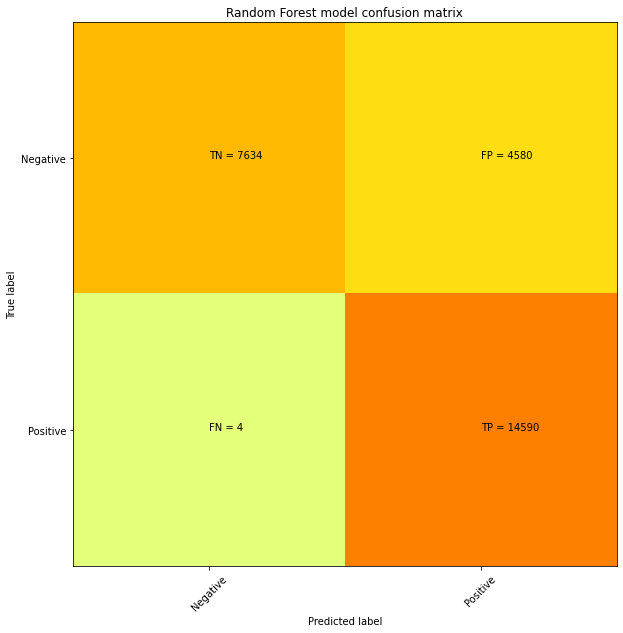

In [53]:
confusio_matrix(y_test,rf_predicted)

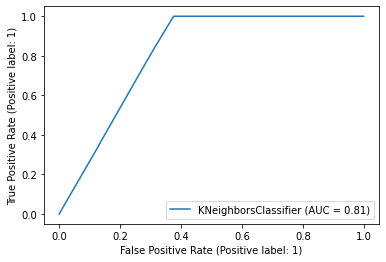

In [54]:
#ROC curve of KNN model
from sklearn.metrics import RocCurveDisplay
KNN_disp = RocCurveDisplay.from_estimator(knn_model, X_test, y_test)

In [55]:
#cross val score of KNN model
from sklearn.model_selection import cross_val_score
cross_val_score(knn_model, X_train, y_train, cv=5, scoring='recall_macro')

array([0.80407016, 0.80784841, 0.8075241 , 0.80497941, 0.80625704])

In [56]:
#performance metrics of KNN model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('F1 score of KNN is ',f1_score(y_test, knn_pred, average="macro"))
print('Precision of KNN is ',precision_score(y_test, knn_pred, average="macro"))
print('Recall of KNN is ',recall_score(y_test, knn_pred, average="macro"))

F1 score of KNN is  0.8158836655688605
Precision of KNN is  0.8795402007101873
Recall of KNN is  0.8116421273906639


In [57]:
#classification report of KNN model
target_names = ['class 1', 'class 2']
print(classification_report(y_test, knn_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       1.00      0.62      0.77     12214
     class 2       0.76      1.00      0.86     14594

    accuracy                           0.83     26808
   macro avg       0.88      0.81      0.82     26808
weighted avg       0.87      0.83      0.82     26808



In [58]:
knn_accuracy=(knn_model.score(X_test,y_test))
des_tree_accuracy=(Des_tree_model.score(X_test,y_test))
random_forest_accuracy=(Random_forest_model.score(X_test,y_test))

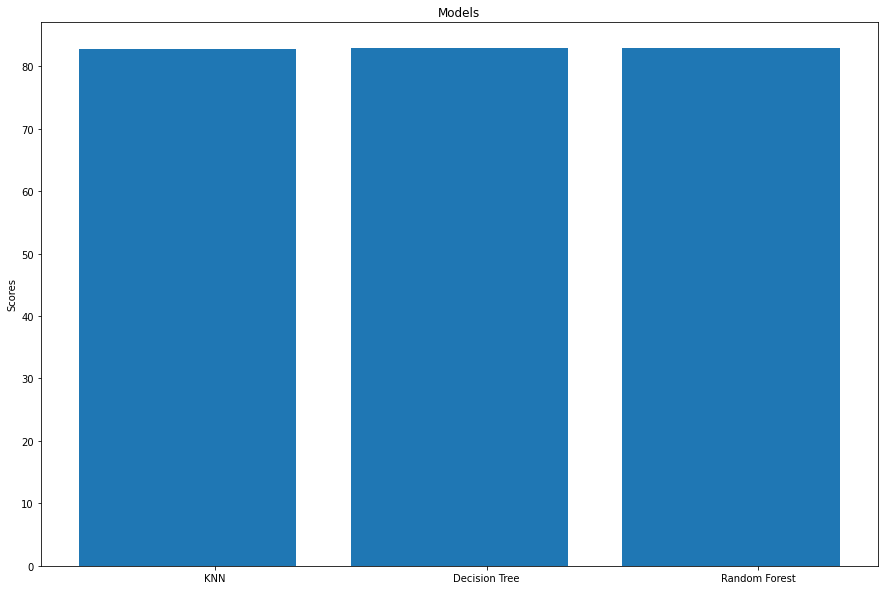

In [59]:
N=3
ind = np.arange(N) 
width = 0.1
plt.figure(figsize=(15,10))     
height = [knn_accuracy*100,des_tree_accuracy*100,random_forest_accuracy*100]
bars = ('KNN','Decision Tree', 'Random Forest')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height)

# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.ylabel('Scores')
plt.title('Models')
plt.xticks(ind + width , ('KNN','Decision Tree', 'Random Forest'))
# plt.legend(loc='best')
plt.show()

# Saving the model

In [60]:
import pickle
# save the model to disk
filename = 'model_static.sav'
pickle.dump(Random_forest_model, open(filename, 'wb'))

In [61]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8290062667860341
